# Entrega 3 Aprendizaje Automático K-Means - Datos PI

Javier Arturo Rozo Alzate - jarozoa@eafit.edu.co  
Johan Steward Rios Naranjo - jriosna1@eafit.edu.co    
Liceth Cristina Mosquera Galvis - lcmosquerg@eafit.edu.co  
Juan Mauricio Cuscagua Lopez - jcuscagu@eafit.edu.co  
Juan Diego Estrada Perez - jestra15@eafit.edu.co

Programa: Aprendizaje Automático
Docente: Lucia Quintero - oquinte1@eafit.edu.co  
05 de noviembre de 2019<br>

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip
import random
from sklearn.manifold import TSNE

'''Data Viz'''
import matplotlib.pyplot as plt #mpl
from matplotlib import style
style.use('ggplot')
import seaborn as sns #sb
color = sns.color_palette()
import matplotlib as mpl
import pandas_profiling
# Though the following import is not directly being used, it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score, pairwise_distances_argmin_min
from sklearn.metrics import roc_curve, auc, roc_auc_score,v_measure_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist


import warnings
warnings.filterwarnings("ignore") 

In [2]:
#cargar los datos
d1 = pd.read_csv("DataPI.csv")
df1= d1.drop(['Class',"Date"], axis=1)

#Eliminando falta de información tanto en filas como columnas se supone que no es necesario
columnname=df1.columns
col_mask=df1.isnull().any(axis=0) 
row_mask=df1.isnull().any(axis=1)
df1.loc[row_mask,col_mask]
df1=np.nan_to_num(df1)
df1 = pd.DataFrame(df1,columns=columnname)
df1.shape
X1 = df1 #X.shape
y1 = d1['Class'].values
X1.shape
y1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Attribute : Open
Valor de la media: 0.0
Valor de la mediana: 0.0
Desviación Estandar: 0.009
Varianza: 0.0


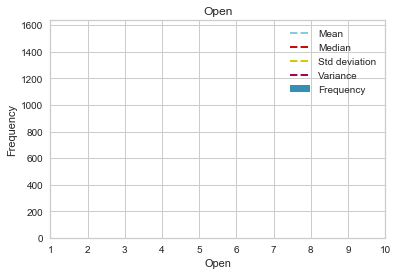

Attribute : High
Valor de la media: 0.0
Valor de la mediana: 0.0
Desviación Estandar: 0.011
Varianza: 0.0


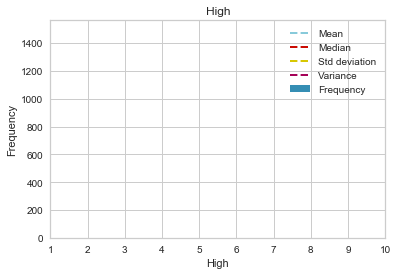

Attribute : Low
Valor de la media: 0.0
Valor de la mediana: 0.0
Desviación Estandar: 0.012
Varianza: 0.0


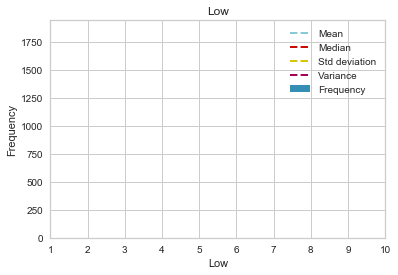

Attribute : Close
Valor de la media: 0.058
Valor de la mediana: 0.0
Desviación Estandar: 0.377
Varianza: 0.142


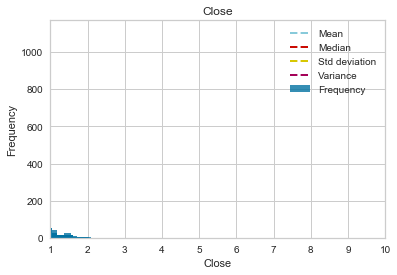

Attribute : Volume
Valor de la media: 14465717.341
Valor de la mediana: 9875193.873
Desviación Estandar: 134433863.081
Varianza: 1.807246354282352e+16


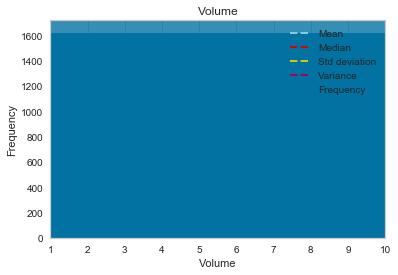

Attribute : volume_adi
Valor de la media: 4009476913.428
Valor de la mediana: 3333873334.5
Desviación Estandar: 3530088656.48
Varianza: 1.2461525922607374e+19


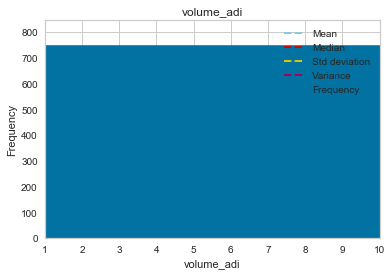

Attribute : volume_obv
Valor de la media: 0.073
Valor de la mediana: 0.062
Desviación Estandar: 0.165
Varianza: 0.027


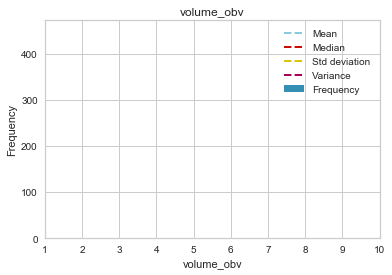

Attribute : volume_cmf
Valor de la media: -38226212.388
Valor de la mediana: -2687829.14
Desviación Estandar: 213862751.285
Varianza: 4.573727638711384e+16


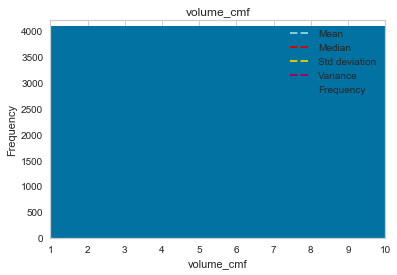

Attribute : volume_fi
Valor de la media: -0.0
Valor de la mediana: 0.0
Desviación Estandar: 0.0
Varianza: 0.0


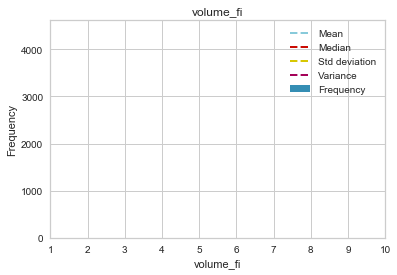

Attribute : volume_em
Valor de la media: -157748.921
Valor de la mediana: 40667.069
Desviación Estandar: 4935624.718
Varianza: 24360391352933.43


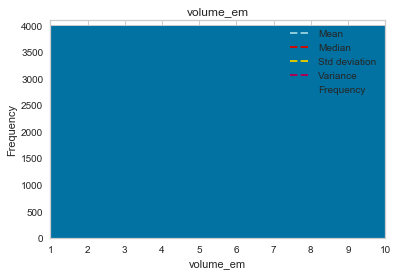

Attribute : volume_vpt
Valor de la media: 15610.962
Valor de la mediana: 4733.998
Desviación Estandar: 20055.942
Varianza: 402240800.993


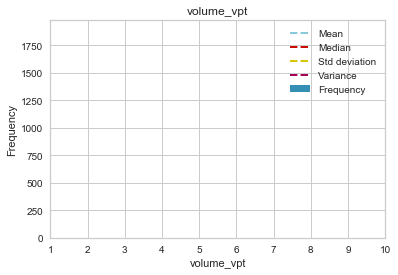

Attribute : volume_nvi
Valor de la media: 154.879
Valor de la mediana: 138.27
Desviación Estandar: 51.257
Varianza: 2627.275


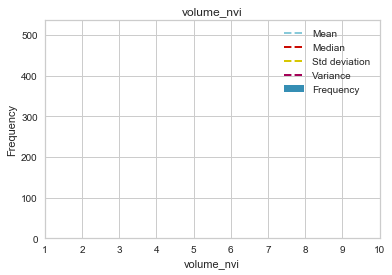

Attribute : volatility_bbh
Valor de la media: 145.869
Valor de la mediana: 129.833
Desviación Estandar: 50.192
Varianza: 2519.219


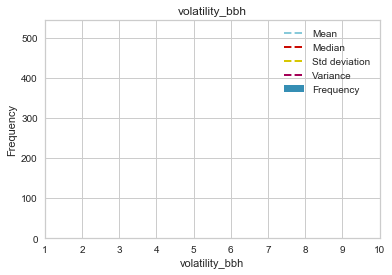

Attribute : volatility_bbl
Valor de la media: 150.374
Valor de la mediana: 133.819
Desviación Estandar: 50.653
Varianza: 2565.73


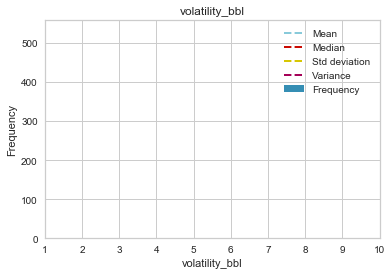

Attribute : volatility_bbm
Valor de la media: 150.459
Valor de la mediana: 133.795
Desviación Estandar: 50.783
Varianza: 2578.922


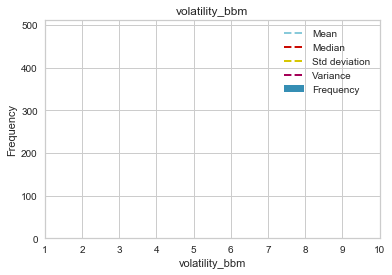

Attribute : volatility_kcc
Valor de la media: 152.297
Valor de la mediana: 135.669
Desviación Estandar: 50.906
Varianza: 2591.394


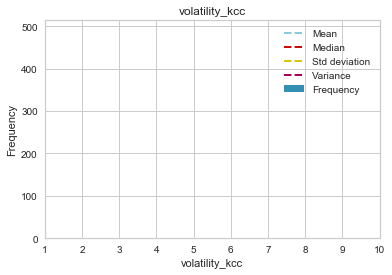

Attribute : volatility_kch
Valor de la media: 148.622
Valor de la mediana: 131.878
Desviación Estandar: 50.679
Varianza: 2568.343


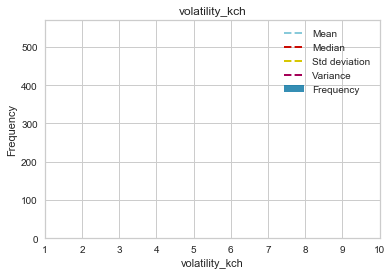

Attribute : volatility_kcl
Valor de la media: 153.87
Valor de la mediana: 137.1
Desviación Estandar: 51.065
Varianza: 2607.615


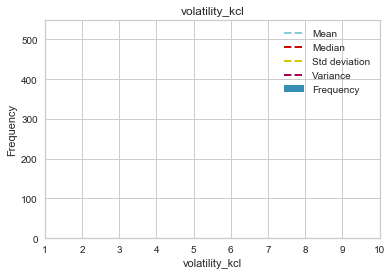

Attribute : volatility_dch
Valor de la media: 146.182
Valor de la mediana: 130.56
Desviación Estandar: 50.183
Varianza: 2518.373


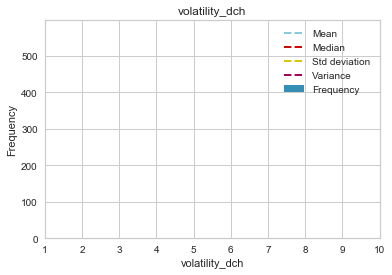

Attribute : volatility_dcl
Valor de la media: 0.166
Valor de la mediana: 0.441
Desviación Estandar: 1.479
Varianza: 2.189


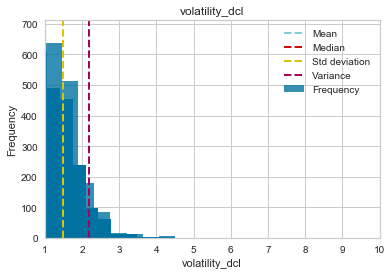

Attribute : trend_macd
Valor de la media: 0.171
Valor de la mediana: 0.425
Desviación Estandar: 1.373
Varianza: 1.885


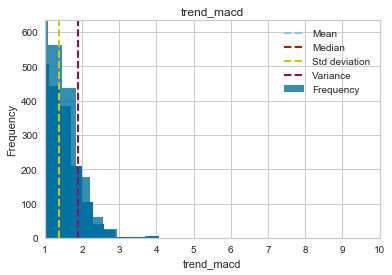

Attribute : trend_macd_signal
Valor de la media: -0.005
Valor de la mediana: -0.008
Desviación Estandar: 0.463
Varianza: 0.214


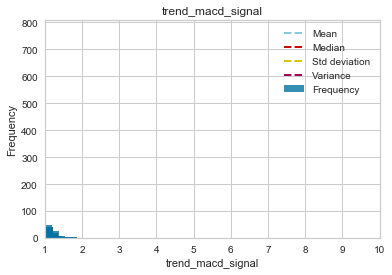

Attribute : trend_macd_diff
Valor de la media: 150.459
Valor de la mediana: 133.828
Desviación Estandar: 50.736
Varianza: 2574.155


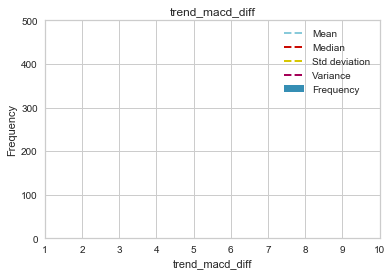

Attribute : trend_ema_fast
Valor de la media: 150.293
Valor de la mediana: 133.719
Desviación Estandar: 50.509
Varianza: 2551.161


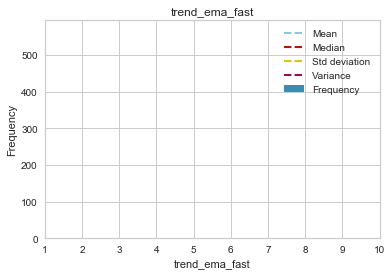

Attribute : trend_ema_slow
Valor de la media: 0.982
Valor de la mediana: 0.983
Desviación Estandar: 0.167
Varianza: 0.028


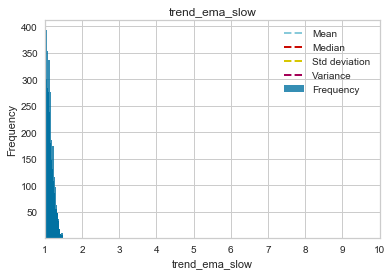

Attribute : trend_vortex_ind_pos
Valor de la media: 0.917
Valor de la mediana: 0.918
Desviación Estandar: 0.154
Varianza: 0.024


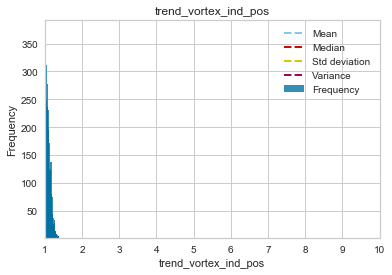

Attribute : trend_vortex_ind_neg
Valor de la media: 0.261
Valor de la mediana: 0.231
Desviación Estandar: 0.185
Varianza: 0.034


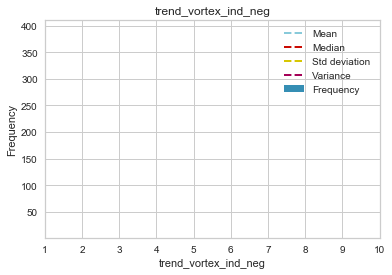

Attribute : trend_vortex_diff
Valor de la media: 0.012
Valor de la mediana: 0.043
Desviación Estandar: 0.154
Varianza: 0.024


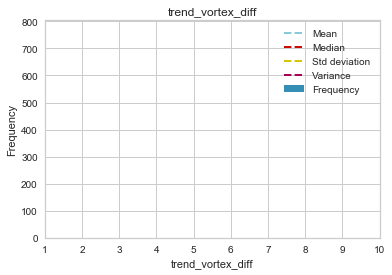

Attribute : trend_trix
Valor de la media: 24.907
Valor de la mediana: 24.865
Desviación Estandar: 1.572
Varianza: 2.47


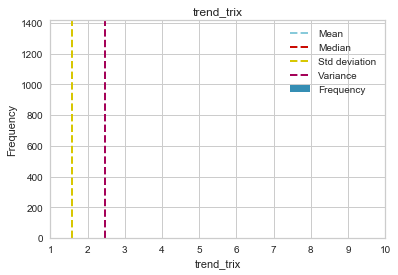

Attribute : trend_mass_index
Valor de la media: 17.885
Valor de la mediana: 42.08
Desviación Estandar: 109.21
Varianza: 11926.9


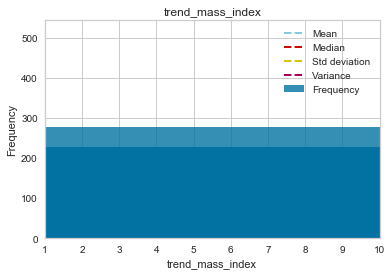

Attribute : trend_cci
Valor de la media: -0.01
Valor de la mediana: 0.052
Desviación Estandar: 2.009
Varianza: 4.036


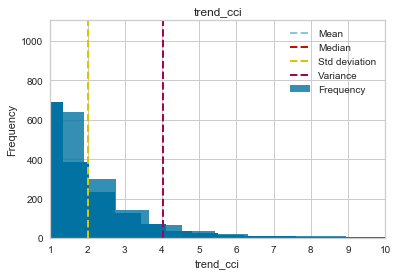

Attribute : trend_dpo
Valor de la media: 3.493
Valor de la mediana: 10.077
Desviación Estandar: 36.665
Varianza: 1344.316


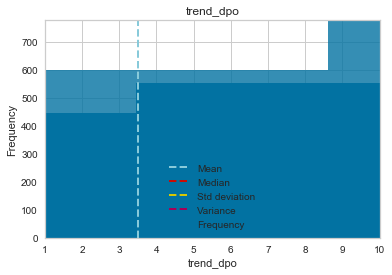

Attribute : trend_kst
Valor de la media: 3.519
Valor de la mediana: 9.895
Desviación Estandar: 35.783
Varianza: 1280.41


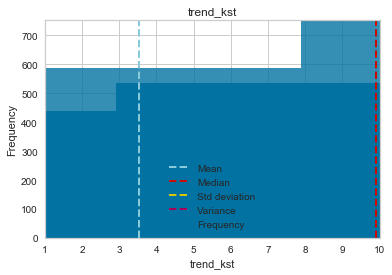

Attribute : trend_kst_sig
Valor de la media: -0.025
Valor de la mediana: -0.805
Desviación Estandar: 11.759
Varianza: 138.273


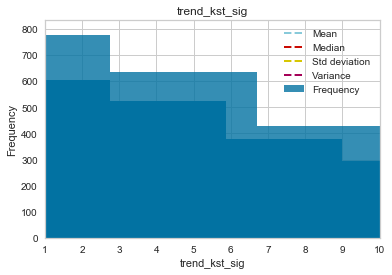

Attribute : trend_kst_diff
Valor de la media: 149.919
Valor de la mediana: 133.56
Desviación Estandar: 50.527
Varianza: 2552.933


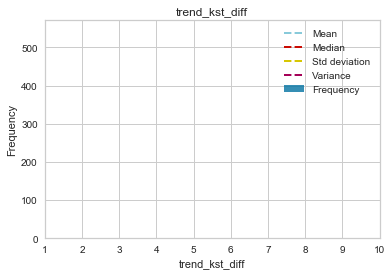

Attribute : trend_ichimoku_a
Valor de la media: 148.914
Valor de la mediana: 132.84
Desviación Estandar: 49.922
Varianza: 2492.18


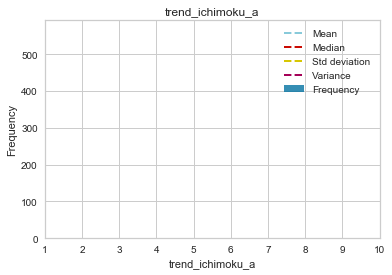

Attribute : trend_ichimoku_b
Valor de la media: 149.32
Valor de la mediana: 133.56
Desviación Estandar: 49.84
Varianza: 2483.977


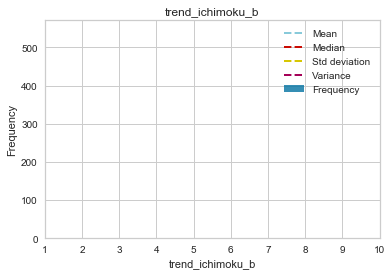

Attribute : trend_visual_ichimoku_a
Valor de la media: 148.28
Valor de la mediana: 132.84
Desviación Estandar: 49.142
Varianza: 2414.968


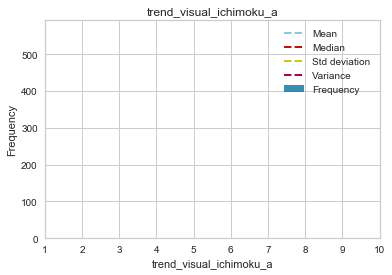

Attribute : trend_visual_ichimoku_b
Valor de la media: 60.696
Valor de la mediana: 68.0
Desviación Estandar: 34.136
Varianza: 1165.298


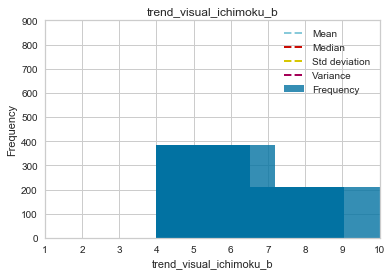

Attribute : trend_aroon_up
Valor de la media: 45.65
Valor de la mediana: 40.0
Desviación Estandar: 34.091
Varianza: 1162.175


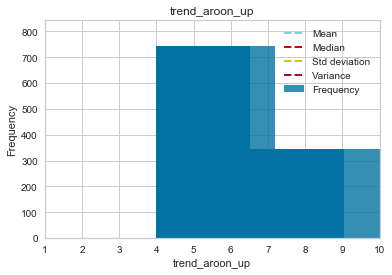

Attribute : trend_aroon_down
Valor de la media: 15.046
Valor de la mediana: 36.0
Desviación Estandar: 60.772
Varianza: 3693.239


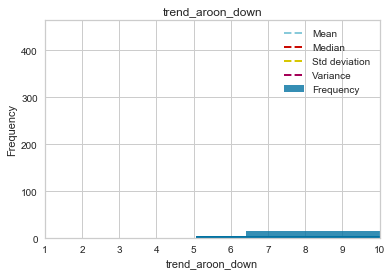

Attribute : trend_aroon_ind
Valor de la media: 53.83
Valor de la mediana: 55.017
Desviación Estandar: 15.881
Varianza: 252.193


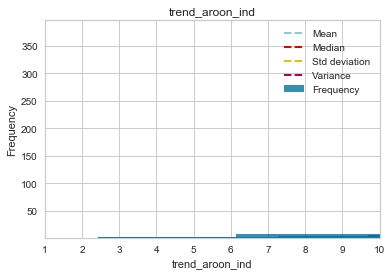

Attribute : momentum_rsi
Valor de la media: 51.931
Valor de la mediana: 51.68
Desviación Estandar: 13.248
Varianza: 175.508


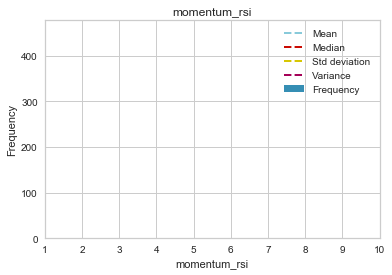

Attribute : momentum_mfi
Valor de la media: 5.139
Valor de la mediana: 5.876
Desviación Estandar: 13.9
Varianza: 193.223


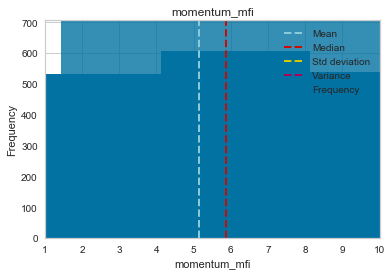

Attribute : momentum_tsi
Valor de la media: 54.032
Valor de la mediana: 54.246
Desviación Estandar: 10.915
Varianza: 119.127


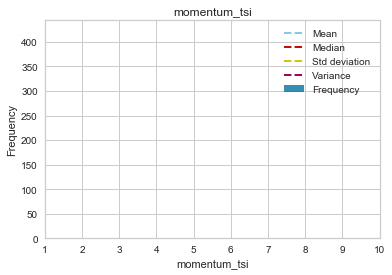

Attribute : momentum_uo
Valor de la media: 59.368
Valor de la mediana: 65.326
Desviación Estandar: 31.084
Varianza: 966.238


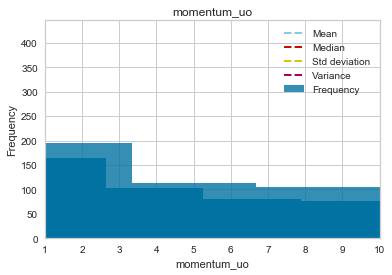

Attribute : momentum_stoch
Valor de la media: 59.364
Valor de la mediana: 64.477
Desviación Estandar: 28.746
Varianza: 826.353


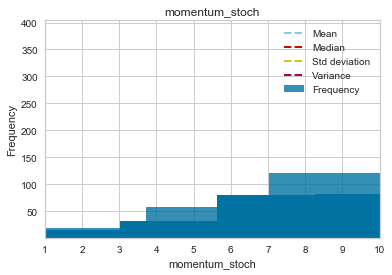

Attribute : momentum_stoch_signal
Valor de la media: -40.632
Valor de la mediana: -34.674
Desviación Estandar: 31.084
Varianza: 966.238


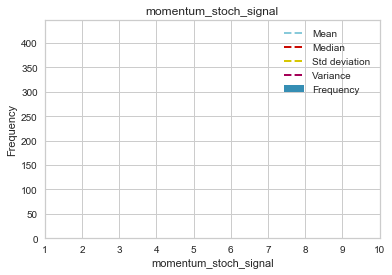

Attribute : momentum_wr
Valor de la media: 0.331
Valor de la mediana: 0.99
Desviación Estandar: 3.786
Varianza: 14.33


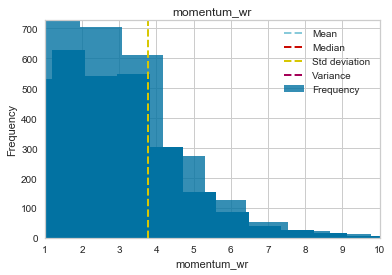

Attribute : momentum_ao
Valor de la media: 0.018
Valor de la mediana: 0.027
Desviación Estandar: 1.194
Varianza: 1.426


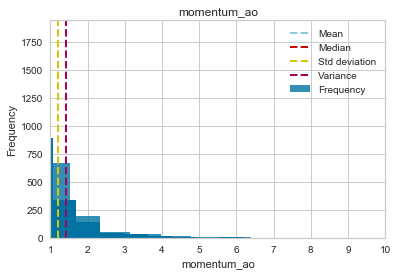

Attribute : others_dr
Valor de la media: 0.011
Valor de la mediana: 0.027
Desviación Estandar: 1.194
Varianza: 1.425


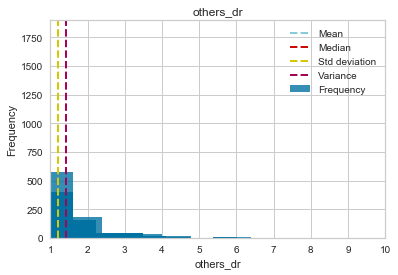

Attribute : others_dlr
Valor de la media: 3.534
Valor de la mediana: -8.05
Desviación Estandar: 34.999
Varianza: 1224.905


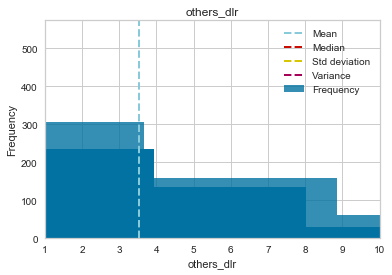

Attribute : others_cr
Valor de la media: 0.689
Valor de la mediana: 0.68
Desviación Estandar: 0.2
Varianza: 0.04


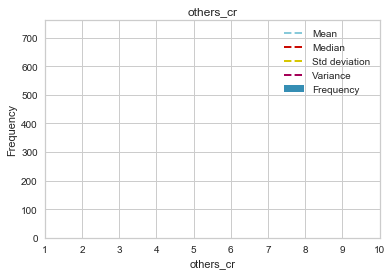

Attribute : Vol_Max
Valor de la media: 0.984
Valor de la mediana: 0.992
Desviación Estandar: 0.022
Varianza: 0.0


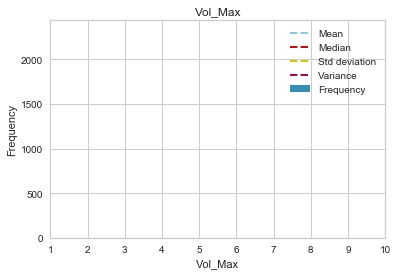

Attribute : Clo_Max
Valor de la media: 0.984
Valor de la mediana: 0.992
Desviación Estandar: 0.022
Varianza: 0.0


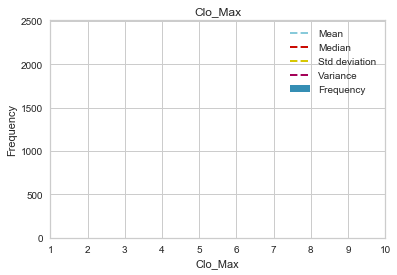

Attribute : Ope_Max
Valor de la media: 0.986
Valor de la mediana: 0.994
Desviación Estandar: 0.02
Varianza: 0.0


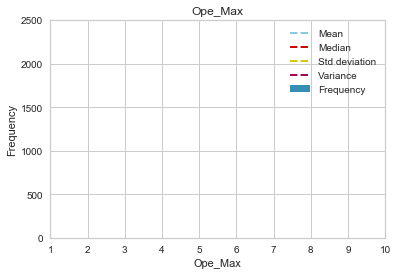

Attribute : Hig_Max
Valor de la media: 0.984
Valor de la mediana: 0.992
Desviación Estandar: 0.023
Varianza: 0.001


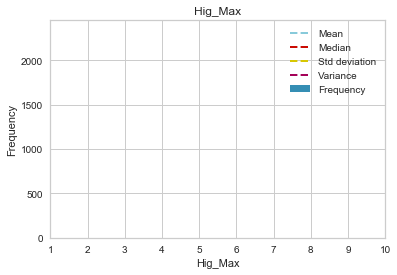

Attribute : Low_Max
Valor de la media: 0.689
Valor de la mediana: 0.68
Desviación Estandar: 0.2
Varianza: 0.04


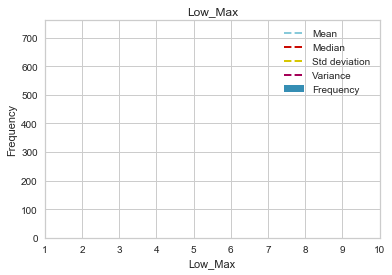

Attribute : Vol_Min
Valor de la media: 0.984
Valor de la mediana: 0.992
Desviación Estandar: 0.022
Varianza: 0.0


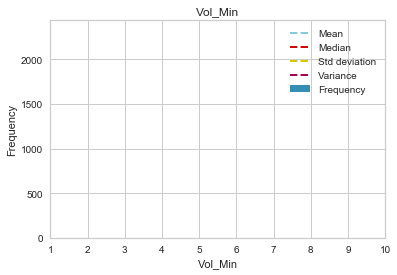

Attribute : Clo_Min
Valor de la media: 0.984
Valor de la mediana: 0.992
Desviación Estandar: 0.022
Varianza: 0.0


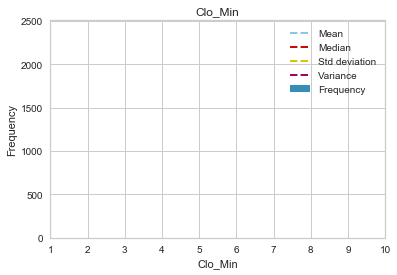

Attribute : Ope_Min
Valor de la media: 0.986
Valor de la mediana: 0.994
Desviación Estandar: 0.02
Varianza: 0.0


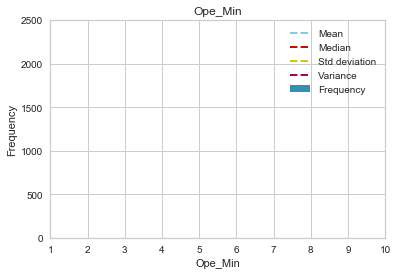

Attribute : Hig_Min
Valor de la media: 0.984
Valor de la mediana: 0.992
Desviación Estandar: 0.023
Varianza: 0.001


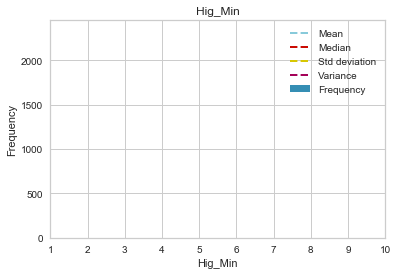

Attribute : Low_Min
Valor de la media: 0.98
Valor de la mediana: 0.988
Desviación Estandar: 0.024
Varianza: 0.001


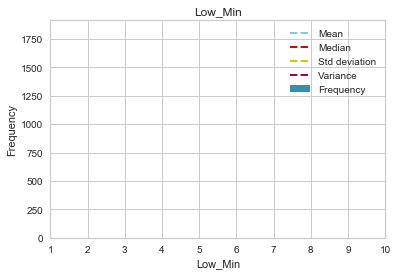

Attribute : Support
Valor de la media: 1.027
Valor de la mediana: 1.021
Desviación Estandar: 0.025
Varianza: 0.001


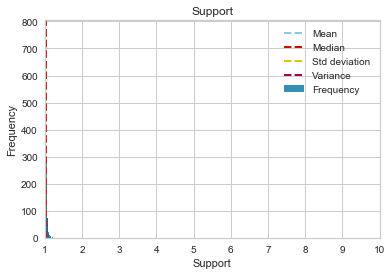

In [3]:
#Calcula la media, la mediana, la desviación estandar y la Varianza por variable

def calculatemetrics(data):
    #Calculo 
    meanval=data.mean()         #Calcula la media por Columna  
    median=data.median()        #Calcula la mediana por Columna
    stddev=data.std()           #Calcula la desviación estandar
    v=data.var()                #Caclcula la Varianza
    
    print("Valor de la media:",round(meanval,3))
    print("Valor de la mediana:",round(median,3))
    print("Desviación Estandar:",round(stddev,3))
    print("Varianza:",round(v,3))
    return meanval,median,stddev,v


#Función para graficar el histograma

def plothistogram():
    
    
#Este código grafica todos los histogramas desde A2-A10 columnas

    for i in range(0,64):    
        data = X1.iloc[:,i+1]        # Toma datos desde la columna dos hacia adelante
        print("Attribute :",columnname[i])
        meanval,median,stddev,v=calculatemetrics(data) # llamar la función para calcular m, med, desv. est y Var
        plt.title(columnname[i])     #Titulo de la columna y añadirlo a la gráfica
        plt.xlabel(columnname[i])    #X-label en la gráfica   
        plt.ylabel('Frequency')      #Y Label en la frecuencia. 



        p, r, _ = plt.hist(data,bins=38)     #Calcular el valor maximo posible de la columna graficada 
        plt.axis([1, 10, 1,p.max()+100])     #Especificar las coordenadas del eje X e Y
        plt.hist(data, alpha =0.8,bins=30,color='b',label='Frequency') #Trazar histograma 

        #Trazar diferentes métricas

        plt.axvline(meanval, color='c', linestyle='dashed', linewidth=2,label='Mean') #Linea media
        plt.axvline(median, color='r', linestyle='dashed', linewidth=2,label='Median')  #Linea mediana
        plt.axvline(stddev, color='y', linestyle='dashed', linewidth=2,label='Std deviation')  #linea desviación estandar
        plt.axvline(v, color='m', linestyle='dashed', linewidth=2,label='Variance')       #Linea Varianza
        plt.legend()
        plt.grid(True)     
        plt.show()     


# Función principal    

if __name__ == "__main__":
    plothistogram()

In [4]:
X1.profile_report() 

In [5]:
def CH_index(X, labels, centroids):
    #X being a pandas dataframe, so X = dataframe.values
    #labels being the (KMeans(n_clusters=i).fit(X)).labels_
    #centroids being the KMeans centroid values of a fitted kmeans model
    '''
    https://github.com/scampion/scikit-learn/blob/master/scikits/learn/cluster/__init__.py
    '''
    mean = np.mean(X,axis=0) 
    B = np.sum([ np.sum(labels==i)*(c - mean)**2 for i,c in enumerate(centroids)])
    W = np.sum([ (x-centroids[labels[i]])**2 for i, x in enumerate(X)])
    c = len(centroids)
    n = len(X)
    return ((n-c)*B )/1.0/((c-1)*W)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3,random_state=109) # 60% training and 40% test
#y_test

In [7]:
#Estandarizar
sc1=StandardScaler() 
sc1.fit(x_train)
X1_std_tr=sc1.transform(x_train)
X1_std_ts=sc1.transform(x_test)

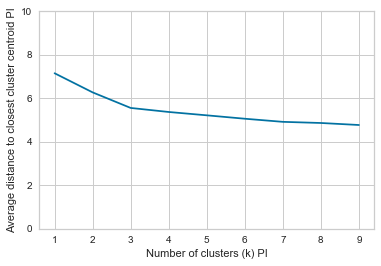

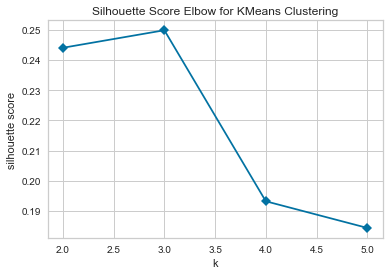

In [8]:
#Escoger k
distance_to_closter_cluster_centre = []
for k in range(1,10):
    kmeans1 = KMeans(n_clusters=k)  
    kmeans1.fit(X1_std_tr)
    distance1 = np.min(kmeans1.transform(X1_std_ts),axis=1)
    average_distance1 = np.mean(distance1)
    distance_to_closter_cluster_centre.append(average_distance1)

clusters1 = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters1, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) PI')
plt.ylabel('Average distance to closest cluster centroid PI')
plt.ylim(0,10)
plt.show()
# Inicializat el KElbowVisualizer con el numero de cluster y la métrica 
visualizer = KElbowVisualizer(kmeans1, k=(2,6), metric='silhouette', timings=False)

# Ajustar los datos y visualizar
visualizer.fit(X1_std_ts)    
visualizer.poof()

In [9]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans1 = KMeans(n_clusters=2, random_state=random_state)
kmeans1.fit(X1_std_tr)
y_pred = kmeans1.fit_predict(X1_std_ts) 
  
print('\nCluster centres PI:')
print(kmeans1.cluster_centers_)


Cluster centres PI:
[[-0.31313811 -0.33730635 -0.28243157 -0.17368893 -0.02937294 -0.36981964
  -0.41712129 -0.75353047 -0.23489953 -0.30800489 -0.23572014 -0.318498
  -0.29947206 -0.32759412 -0.31384205 -0.33642341 -0.32772264 -0.34503736
  -0.30256171 -0.32871587 -0.82132494 -0.63404335 -0.74142299 -0.33813178
  -0.31562407 -0.93602197  0.97285264  0.00459444 -0.57837909  0.32356604
  -1.14586215  0.39765764 -0.6243446  -0.42012482 -0.66873051 -0.32520392
  -0.29375199 -0.27066269 -0.27210464 -0.71310531  0.82695307 -0.86681489
  -1.04681806 -0.75552675 -0.54463305 -0.931742   -1.08567325 -1.09121097
  -1.08567325 -0.82898198 -0.17368893 -0.17842979 -0.37573075  0.16805436
  -0.8441481  -0.8686729  -0.86754715 -0.84664416  0.16805436 -0.8441481
  -0.8686729  -0.86754715 -0.84664416 -0.85223715 -0.27894214]
 [ 0.14800175  0.19727731  0.16941462  0.15737851 -0.05506697  0.20468691
   0.17068769  0.44726799  0.12205299  0.19498035  0.10950852  0.06861065
   0.0701054   0.09126751  0.08

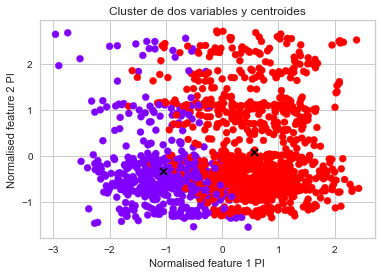

In [10]:
#grafica de las columnas 1 y 2 
labels1 = kmeans1.labels_

plt.scatter(X1_std_ts[:,42],X1_std_ts[:,15],c=labels1, cmap=plt.cm.rainbow)
plt.scatter(kmeans1.cluster_centers_[:, 42], kmeans1.cluster_centers_[:, 15], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('Normalised feature 1 PI')
plt.ylabel('Normalised feature 2 PI')
plt.show() 

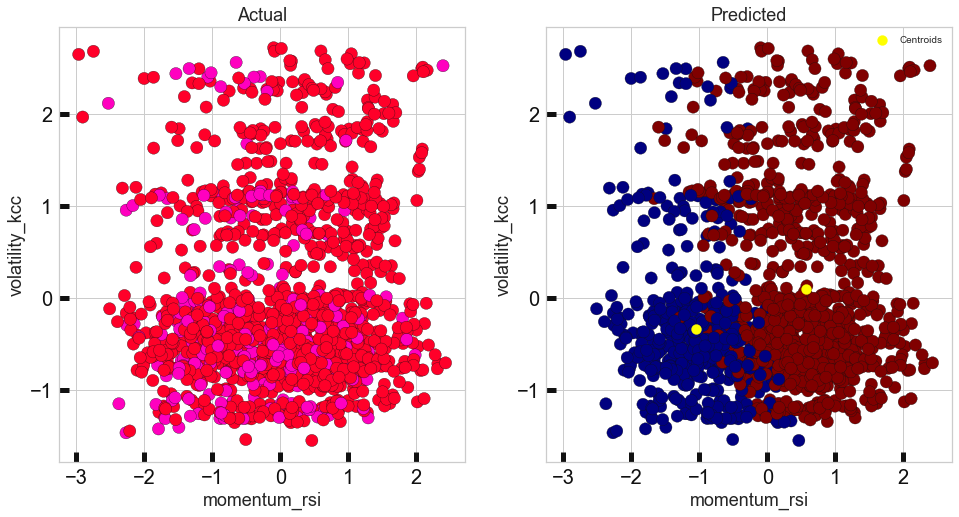

In [11]:
#this will tell us to which cluster does the data observations belong.
labels1 = kmeans1.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X1_std_ts[:,42], X1_std_ts[:, 15], c=y_test, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[42], fontsize=18)
axes[0].set_ylabel(columnname[15], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X1_std_ts[:, 42], X1_std_ts[:, 15], c=labels1, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[42], fontsize=18)
axes[1].set_ylabel(columnname[15], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(kmeans1.cluster_centers_[:, 42], kmeans1.cluster_centers_[:, 15], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [12]:
# Calculate silhouette_score
print('\n Silhouette_score PI_STD:')
print(silhouette_score(X1_std_ts, kmeans1.labels_))

CH_index_std=CH_index(X1_std_ts, kmeans1.labels_, kmeans1.cluster_centers_)
print('\n CH_index_std:',CH_index_std)


 Silhouette_score PI_STD:
0.24403796983928716

 CH_index_std: 438.63788305146363


## sin estandarizar

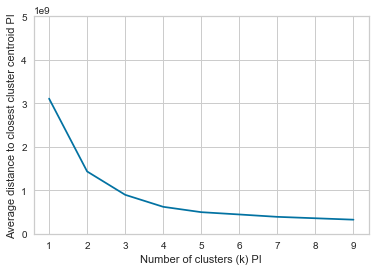

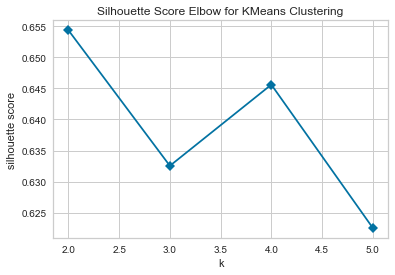

In [13]:
#Escoger k
distance_to_closter_cluster_centre = []
for k in range(1,10):
    kmeans2 = KMeans(n_clusters=k)  
    kmeans2.fit(x_train)
    distance1 = np.min(kmeans2.transform(x_test),axis=1)
    average_distance1 = np.mean(distance1)
    distance_to_closter_cluster_centre.append(average_distance1)

clusters2 = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters2, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) PI')
plt.ylabel('Average distance to closest cluster centroid PI')
plt.ylim(0,5000000000)
plt.show()
# Inicializat el KElbowVisualizer con el numero de cluster y la métrica 
visualizer = KElbowVisualizer(kmeans2, k=(2,6), metric='silhouette', timings=False)

# Ajustar los datos y visualizar
visualizer.fit(x_test)    
visualizer.poof()

In [14]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans2 = KMeans(n_clusters=2, random_state=random_state)
kmeans2.fit(x_train)
y_pred2 = kmeans2.fit_predict(x_test) 
  
print('\nCluster centres PI:')
print(kmeans2.cluster_centers_)


Cluster centres PI:
[[ 2.45424311e-04  3.52357569e-04  6.17303858e-04  5.36613373e-04
   4.28961836e-02  2.68574919e+07  7.44866603e+09  1.24503508e-01
  -5.13420440e+07  4.45518459e-10 -1.22362111e+05  2.91091926e+04
   1.90053151e+02  1.80805313e+02  1.85429232e+02  1.85843198e+02
   1.87594186e+02  1.84092209e+02  1.88974973e+02  1.81062916e+02
   5.85714718e-01  5.88947577e-01 -3.23285934e-03  1.85777359e+02
   1.85191644e+02  1.00608105e+00  8.73465465e-01  2.84080341e-01
   5.07011410e-02  2.49311004e+01  3.19893724e+01 -1.30819715e-01
   1.18784076e+01  1.16556008e+01  2.22806793e-01  1.84948697e+02
   1.82891244e+02  1.82789962e+02  1.80988362e+02  6.89984592e+01
   4.13682589e+01  2.76302003e+01  5.67310782e+01  5.32919742e+01
   1.07413808e+01  5.67234393e+01  6.44639627e+01  6.47761038e+01
  -3.55360373e+01  1.24486400e+00  5.36613368e-02  5.00601514e-02
   2.79993048e+01  6.86424027e-01  9.88976670e-01  9.88860747e-01
   9.90223318e-01  9.88298942e-01  6.86424027e-01  9.88

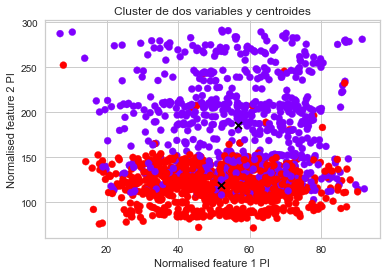

In [15]:
#grafica de las columnas 1 y 2 
labels2 = kmeans2.labels_

plt.scatter(x_test.iloc[:,42],x_test.iloc[:,15],c=labels2, cmap=plt.cm.rainbow)
plt.scatter(kmeans2.cluster_centers_[:, 42], kmeans2.cluster_centers_[:, 15], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('Normalised feature 1 PI')
plt.ylabel('Normalised feature 2 PI')
plt.show() 

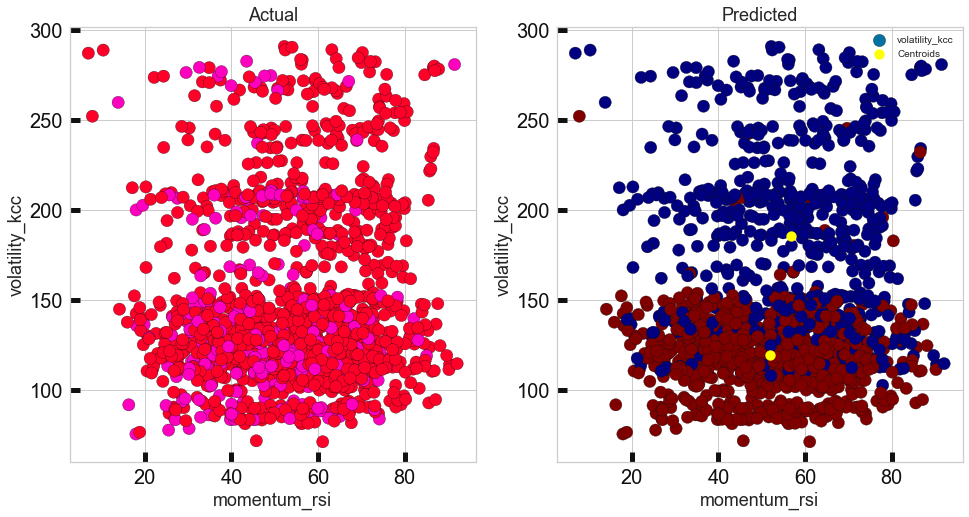

In [16]:
#this will tell us to which cluster does the data observations belong.
labels2 = kmeans2.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_test.iloc[:,42], x_test.iloc[:, 15], c=y_test, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[42], fontsize=18)
axes[0].set_ylabel(columnname[15], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(x_test.iloc[:, 42], x_test.iloc[:, 15], c=labels2, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[42], fontsize=18)
axes[1].set_ylabel(columnname[15], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(kmeans2.cluster_centers_[:, 42], kmeans2.cluster_centers_[:, 15], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [17]:
# Calculate silhouette_score
print('\n Silhouette_score PI_STD:')
print(silhouette_score(x_test, kmeans2.labels_))
xt = np.asarray(x_test)
CH_index_Normal=CH_index(xt, kmeans2.labels_, kmeans2.cluster_centers_)
print('\n CH_index_Normal:',CH_index_Normal)


 Silhouette_score PI_STD:
0.6543460743642528

 CH_index_Normal: 5233.561663067677


# Bajas Dimensiones PCA

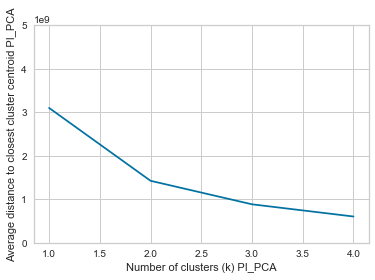

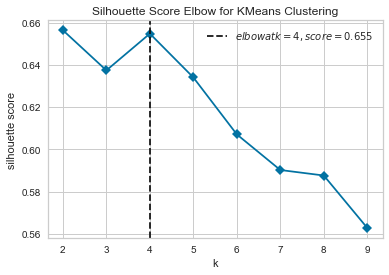

In [18]:
n_components = 2
whiten = False
random_state = None

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)
X_PCA_tr = pca.fit_transform(x_train)
X_PCA_tr = pd.DataFrame(data=X_PCA_tr)

X_PCA_ts = pca.transform(x_test)
X_PCA_ts = pd.DataFrame(data=X_PCA_ts)

#dividir en train y test
#x_PCA_tr, x_PCA_ts, y_PCA_tr, y_PCA_ts = train_test_split(X1_PCA, y1, test_size=0.3,random_state=109) 

#Escoger k
distance_to_closter_cluster_centre = []
for k in range(1,5):
    kmeans_P1 = KMeans(n_clusters=k)  
    kmeans_P1.fit(X_PCA_tr)
    distance_P1 = np.min(kmeans_P1.transform(X_PCA_ts),axis=1)
    average_distance_P1 = np.mean(distance_P1)
    distance_to_closter_cluster_centre.append(average_distance_P1)

clusters_P1 = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters_P1, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) PI_PCA')
plt.ylabel('Average distance to closest cluster centroid PI_PCA')
plt.ylim(0,5000000000)
plt.show()

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans_P1, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_PCA_ts)    
visualizer.poof()


Cluster centres PI_PCA:
[[-2.80960904e+09 -1.22682087e+06]
 [ 3.43130370e+09  1.93483862e+06]]


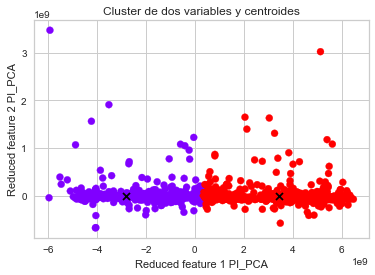


 Silhouette_score PI_PCA:
0.6563890766794899

 CH_index_PCA: 1337529.5862832295


In [19]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans_P1 = KMeans(n_clusters=2, random_state=random_state)
y_pred_PCA = kmeans_P1.fit_predict(X_PCA_tr) 
kmeans_P1.fit(X_PCA_ts)  
print('\nCluster centres PI_PCA:')
print(kmeans_P1.cluster_centers_)
#grafica de las columnas 1 y 2 
labels_P1 = kmeans_P1.labels_

plt.scatter(X_PCA_ts.iloc[:,0],X_PCA_ts.iloc[:,1],c=labels_P1, cmap=plt.cm.rainbow)
plt.scatter(kmeans_P1.cluster_centers_[:, 0], kmeans_P1.cluster_centers_[:, 1], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('Reduced feature 1 PI_PCA')
plt.ylabel('Reduced feature 2 PI_PCA')
plt.show() 

# Calculate silhouette_score
print('\n Silhouette_score PI_PCA:')
print(silhouette_score(X_PCA_ts, kmeans_P1.labels_))
CH_index_PCA=CH_index(X_PCA_ts, kmeans_P1.labels_, kmeans_P1.cluster_centers_)
print('\n CH_index_PCA:',CH_index_PCA)


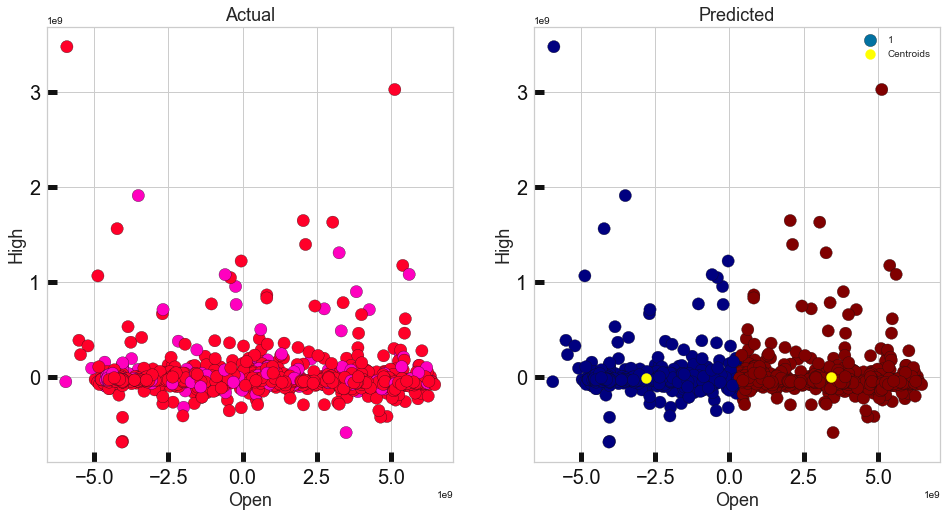

In [20]:
#this will tell us to which cluster does the data observations belong.
labels3 = kmeans_P1.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_PCA_ts.iloc[:,0], X_PCA_ts.iloc[:, 1], c=y_test, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[0], fontsize=18)
axes[0].set_ylabel(columnname[1], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X_PCA_ts.iloc[:, 0], X_PCA_ts.iloc[:, 1], c=labels3, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[0], fontsize=18)
axes[1].set_ylabel(columnname[1], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(kmeans_P1.cluster_centers_[:, 0], kmeans_P1.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [21]:
tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
x_tsne_tr = tsne.fit_transform(x_train)
x_tsne_ts = tsne.fit_transform(x_test)

#df_tsne = pd.DataFrame(x_tsne_tr, columns=['x', 'y'], index=x_tsne_tr.index)
#dff = pd.concat([x_tsne_tr, df_tsne], axis=1)

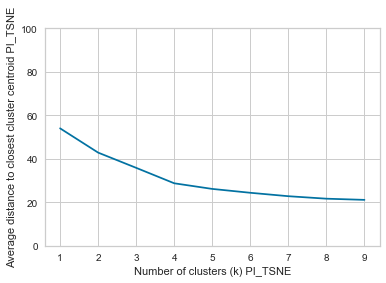

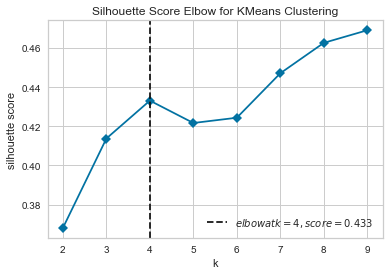

In [22]:
#dividir en train y test
#x_tsne_tr, x_tsne_ts, y_tsne_tr, y_tsne_ts = train_test_split(df_tsne, y1, test_size=0.3,random_state=109) 

#Escoger k
distance_to_closter_cluster_centre = []
for k in range(1,10):
    kmeans_T1 = KMeans(n_clusters=k)  
    kmeans_T1.fit(x_tsne_tr)
    distance_T1 = np.min(kmeans_T1.transform(x_tsne_ts),axis=1)
    average_distance_T1 = np.mean(distance_T1)
    distance_to_closter_cluster_centre.append(average_distance_T1)

clusters_T1 = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters_T1, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) PI_TSNE')
plt.ylabel('Average distance to closest cluster centroid PI_TSNE')
plt.ylim(0,100)
plt.show()

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans_T1, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(x_tsne_ts)    
visualizer.poof()


Cluster centres PI_TSNE:
[[-34.435387  22.417242]
 [ 25.885998 -17.591122]]


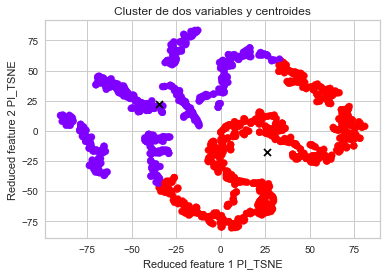


 Silhouette_score PI_TSNE:
0.36797163

 CH_index_tsne: 937.6753312283064


In [23]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans_T1 = KMeans(n_clusters=2, random_state=random_state)
y_pred_T = kmeans_T1.fit_predict(x_tsne_tr) 
kmeans_T1.fit(x_tsne_ts)  
print('\nCluster centres PI_TSNE:')
print(kmeans_T1.cluster_centers_)
#grafica de las columnas 1 y 2 
labels_T1 = kmeans_T1.labels_

plt.scatter(x_tsne_ts[:,0],x_tsne_ts[:,1],c=labels_T1, cmap=plt.cm.rainbow)
plt.scatter(kmeans_T1.cluster_centers_[:, 0], kmeans_T1.cluster_centers_[:, 1], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('Reduced feature 1 PI_TSNE')
plt.ylabel('Reduced feature 2 PI_TSNE')
plt.show() 

# Calculate silhouette_score
print('\n Silhouette_score PI_TSNE:')
print(silhouette_score(x_tsne_ts, kmeans_T1.labels_))
xtsne = np.asarray(x_tsne_ts)
CH_index_tsne=CH_index(xtsne, kmeans_T1.labels_, kmeans_T1.cluster_centers_)
print('\n CH_index_tsne:',CH_index_tsne)


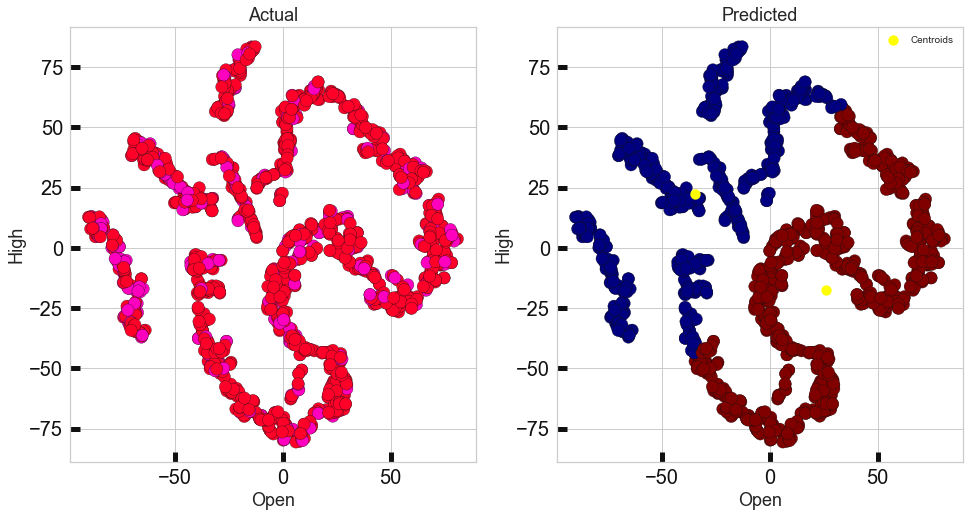

In [24]:
#this will tell us to which cluster does the data observations belong.
labels4 = kmeans_T1.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_tsne_ts[:,0], x_tsne_ts[:, 1], c=y_test, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(columnname[0], fontsize=18)
axes[0].set_ylabel(columnname[1], fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(x_tsne_ts[:, 0], x_tsne_ts[:, 1], c=labels4, cmap='jet',edgecolor='k', s=150)
axes[1].set_xlabel(columnname[0], fontsize=18)
axes[1].set_ylabel(columnname[1], fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=18)

#Plotting the centroids of the clusters
plt.scatter(kmeans_T1.cluster_centers_[:, 0], kmeans_T1.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [25]:
print(v_measure_score(y_test, kmeans_T1.labels_))
print(v_measure_score(y_test, kmeans1.labels_))
print(v_measure_score(y_test, kmeans2.labels_))
print(v_measure_score(y_test, kmeans_P1.labels_))

0.00430968332969807
0.014851853642067132
0.00819407182240517
0.008215825165504361


In [28]:
yt=(pd.DataFrame([y_test])).T
yt['y_std'] = kmeans1.labels_
yt['y_normal'] = kmeans2.labels_
yt['y_PCA'] = kmeans_P1.labels_
yt['y_TSNE'] =kmeans_T1.labels_
#yt

In [29]:
export_csv = yt.to_csv (r'D:\Dcorporativo\Personal\Maestria\AprendizajeAutomatico\Entrega3\Y_result.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

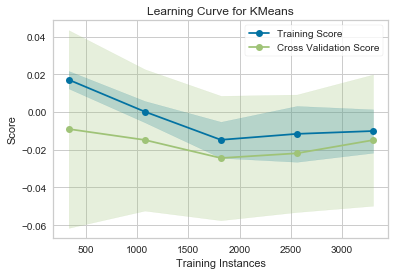

In [31]:
from yellowbrick.model_selection import LearningCurve


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = LearningCurve(model, scoring="adjusted_rand_score", random_state=42)

visualizer.fit(X1, y1)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure